<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/04Apr20_5_central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Limit Theorem

### Introduction

In the few lessons we saw how we can calculate statistics like the standard error of the means using both an analytic approach and a computational approach.  In this lesson, we'll understand a little further one theorem that this analytic approach relies on - called the central limit theorem.

### Loading our Sample

Once again let's load up our sample data on NBA players.  Now this time let's try to calculate sample statistics on the number of NBA games played.

In [0]:
import pandas as pd
url = "gs://curriculum-assets/mod-2/players_sample.csv"
players_df = pd.read_csv(url, index_col = 0)

> We select `games_played` and drop missing values.

In [0]:
games_played_cleaned = players_df.games_played.dropna()

Now let's take a sample of our data.

In [0]:
sample_of_games_played = games_played_cleaned.sample(n = 100)

And plot the data.

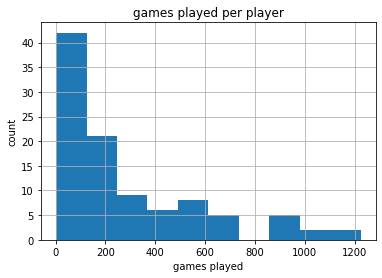

In [0]:
import matplotlib.pyplot as plt
fig_pop = plt.figure()
ax = fig_pop.add_subplot(111)
ax.set(title = 'games played per player', xlabel = 'games played', ylabel ='count')
sample_of_games_played.hist(ax = ax)

Now with a distribution tailed strongly to the right, how can we be sure that a sample mean will be near our underlying mean?  Remember, our formula for the mean is simply to take the mean of our sample, and then we based the standard error on the sample standard deviation.

$se = \frac{S}{\sqrt{n}}$

But can we really assume that the average amount our mean will be off by will be $\pm se$?  For example, for our sample above, the mean is $278.82$.

In [0]:
sample_of_games_played.mean()
# 278.82

278.82

Isn't more likely that the real mean is tilted in one direction or the other, with such an asymmetric distribution.

The answer is of course, no.

### Distribution of the Means

What we are looking at above is the distribution of the population.  But the standard error relies on the distribution of sample means.  Let's see what that looks like. 

And now for the distribution of the means, we can draw a bunch of samples, calculate the means, and then plot them.

In [0]:
import numpy as np
from numpy import random
random.seed(2)

def make_samples(sample_ser, n_samples= 1000):
    n_rows = sample_ser.shape[0]
    samples = []
    for i in range(n_samples):
        sample_idcs = random.choice(n_rows, n_rows)
        sample = sample_ser.iloc[sample_idcs]
        samples.append(sample)
    return samples

In [0]:
samples = make_samples(sample_of_games_played)

In [0]:
sample_means = [sample.mean() for sample in samples]

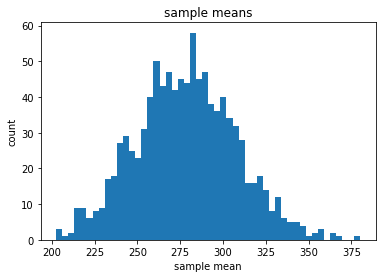

In [0]:
import matplotlib.pyplot as plt
fig_means = plt.figure()
ax = fig_means.add_subplot(111)
ax.set(title = 'sample means', xlabel = 'sample mean', ylabel ='count')
ax.hist(sample_means, bins = 50)
plt.show()

The above is an illustration of the central limit theorem.  

> The **central limit theorem**: The distribution of the means of the sample distributions tends toward a normal distribution (informally a “bell curve”), irrespective of the shape of the population distribution.

> Really, the central limit theorem even extends beyond the distribution of sample means, and to most sample statistics, but the means is good enough for now. 

So because the distribution of the means is symmetric, we see that we tend to be within a certain plus or minus standard error each time that we calculate the sample mean. 

### Summary

In this lesson, we learned about the central limit theorem.  As we saw, central limit theorem says that  distribution of the means of the sample distributions tends toward a normal distribution (informally a “bell curve”), irrespective of the shape of the underlying population distribution.

### Resources

[Central Limit Theorem Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)